#**EDA - Heart Disease Dataset**

In [1]:
# If pandas profiling gives an error, please update pandas-profiling by running this command in the comments below.
!pip install pandas-profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 31.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=745a38ceb4e7eac85f1a70865d93c161486784cc57385a9dd1ba12b8cc530f67
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempti

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import numpy.random as npr
import pandas as pd

# sets matplotlib to inline and displays graphs below the corressponding cell.
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline  
import matplotlib.cm as cm
style.use('fivethirtyeight')

import seaborn as sns
sns.set(style='whitegrid',color_codes=True)

# dimentionality reduction imports :
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# useful build-in python functions
from sklearn import metrics

#model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from pandas_profiling import ProfileReport
from collections import Counter

In [3]:
train = pd.read_csv('/content/heart.csv')
print('The shape of the data is: ', train.shape)
train.head()

The shape of the data is:  (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Performing pandas profiling before data preprocessing.
profile = ProfileReport(train,
                        title='Pandas Profiling before Data Preprocessing',
                        minimal=True, progress_bar=False)
profile.to_notebook_iframe()

In [7]:
train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# occurrence based on all columns
duplicate_train = train[train.duplicated()]
 
# Print the resultant Dataframe
print("Duplicate Rows for data:")
duplicate_train

Duplicate Rows for data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

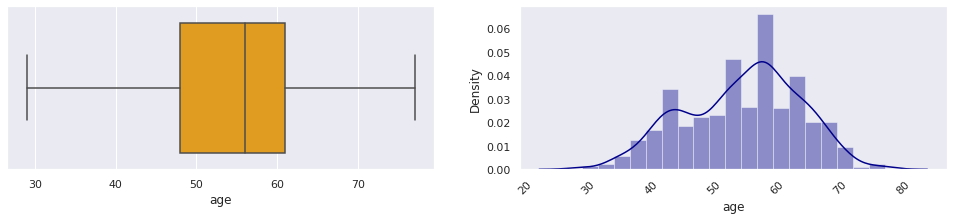

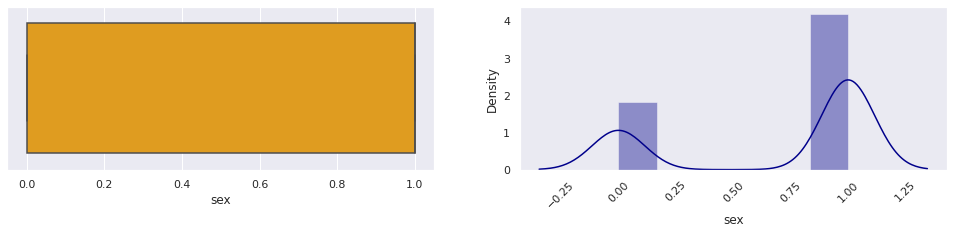

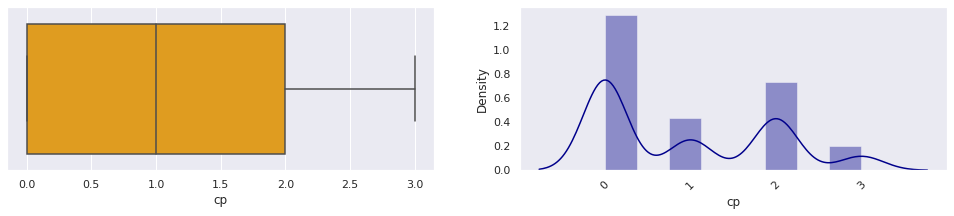

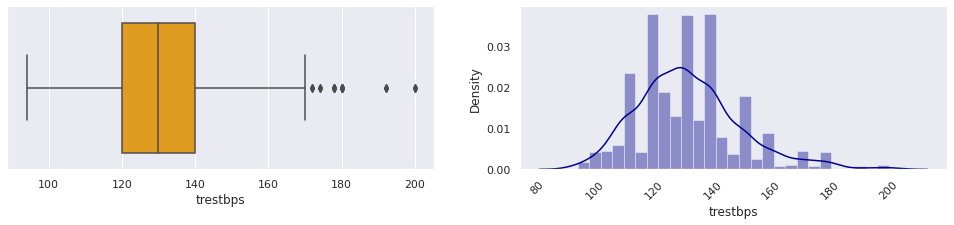

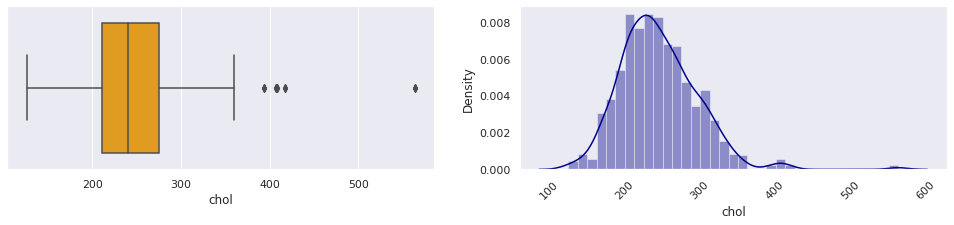

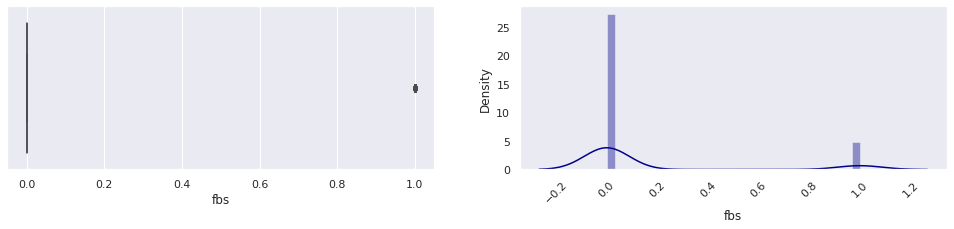

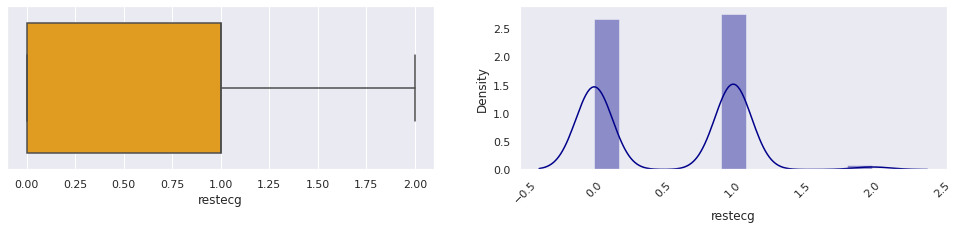

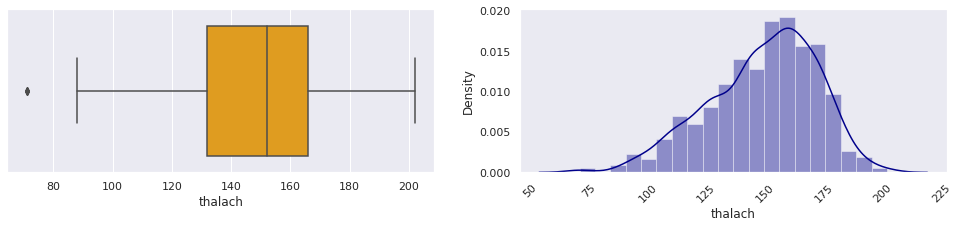

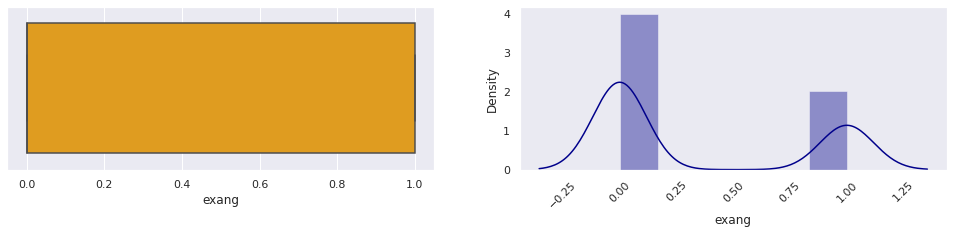

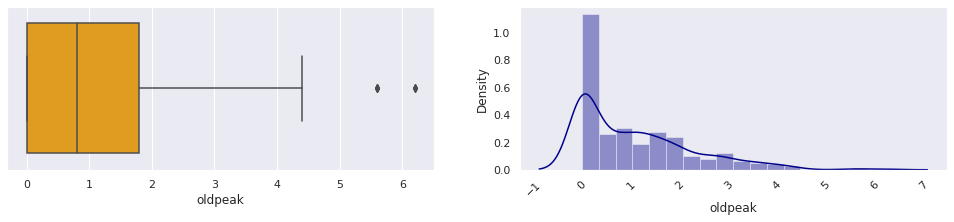

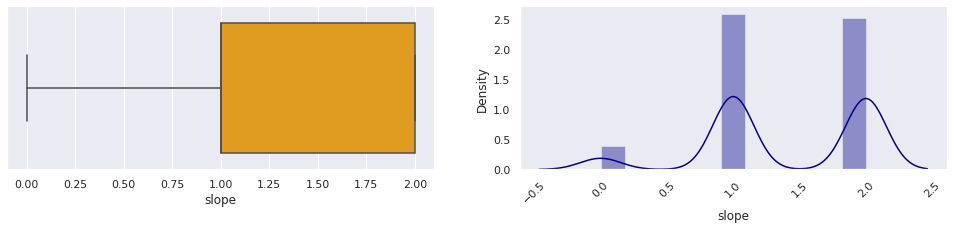

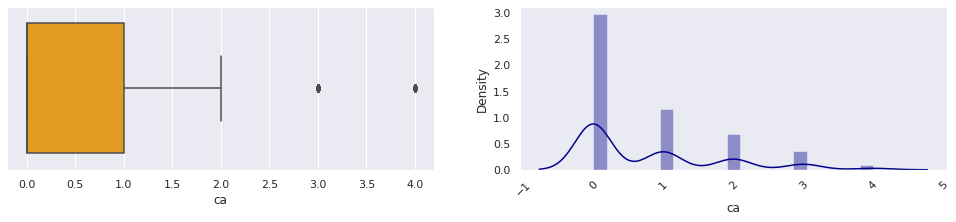

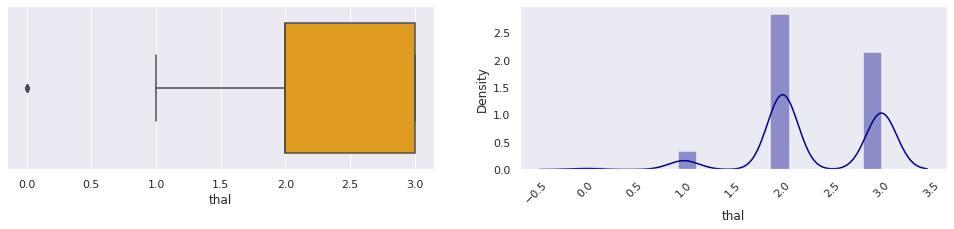

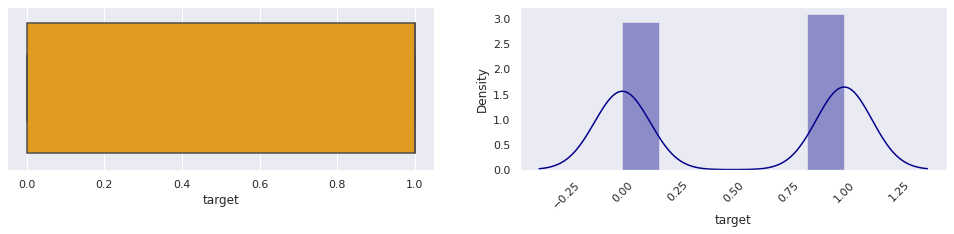

In [9]:
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Separating numerical and categrical columns
categorical_cols,numerical_cols = [],[]
for i in tqdm(train.columns):
  if train[i].dtypes !='object':
    numerical_cols.append(i)
  if train[i].dtypes =='object':
    categorical_cols.append(i)


for i in tqdm(numerical_cols):
  plt.figure(figsize = [15,3])
  sns.set(style="darkgrid")
  plt.subplot(1, 2, 1)
  sns.boxplot(data=train,x=i,color='orange')
  plt.subplot(1, 2, 2)
  sns.distplot(a=train[i],color='darkblue')
  plt.xticks(rotation=45)
  plt.grid()
  plt.show()

In [10]:
for i in tqdm(categorical_cols):
  plt.figure(figsize = [20,8])
  sns.set(style="darkgrid")
  sns.barplot(x=train[i].value_counts().index, y=train[i].value_counts().values)
  plt.xlabel(i)
  plt.ylabel('Values of {i}'.format(i=i))
  plt.xticks(rotation=45)
  plt.grid()
  plt.show()

0it [00:00, ?it/s]

In [11]:
import plotly.express as px
date_list = []
for i in range (1,7):
  date_list.append(i)
  
px.histogram(train, x='slope',
             category_orders=dict(day=date_list),
             title='Day_of_month vs. rainy day',
             color='oldpeak')

In [12]:
import plotly.express as px
date_list = []
for i in range (1,31):
  date_list.append(i)
  
px.histogram(train, x='trestbps',
             category_orders=dict(day=date_list),
             title='Impact of cp in trestbps',
             color='cp')

In [13]:
px.histogram(train, x='trestbps',
             category_orders=dict(day=date_list),
             title='Impact of restecg in tresbps',
             color='restecg')

In [14]:
px.histogram(train, x='trestbps',
             category_orders=dict(day=date_list),
             title='Impact of exang in trestbps',
             color='exang')

In [15]:
px.histogram(train, x='trestbps',
             category_orders=dict(day=date_list),
             title='Impact of slope in trestbps',
             color='slope')

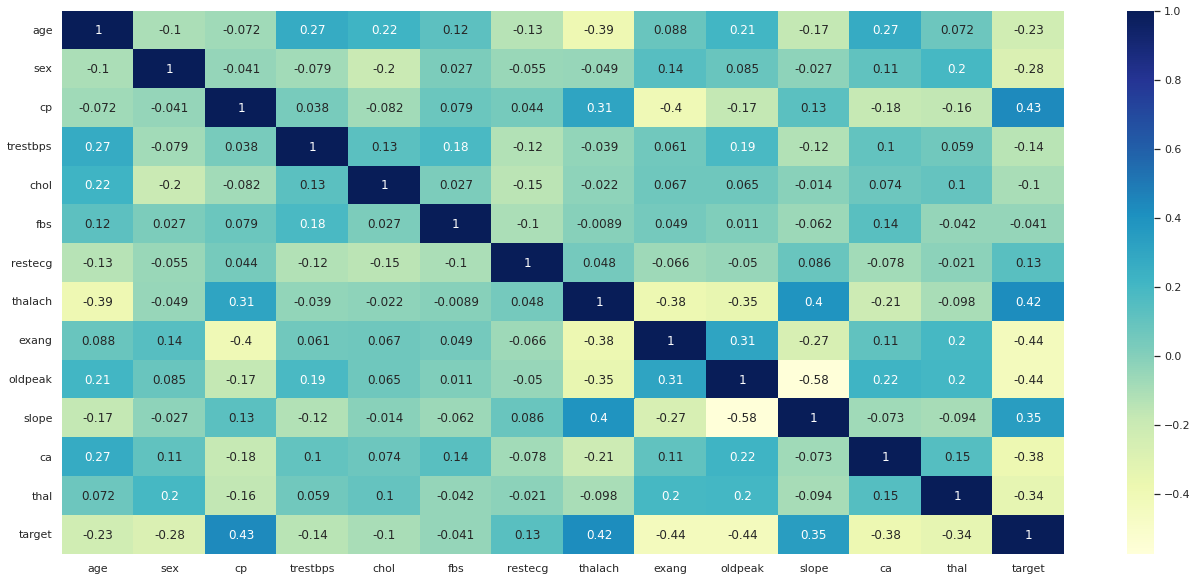

In [16]:
##plotting correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = [20,10])
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
plt.show()